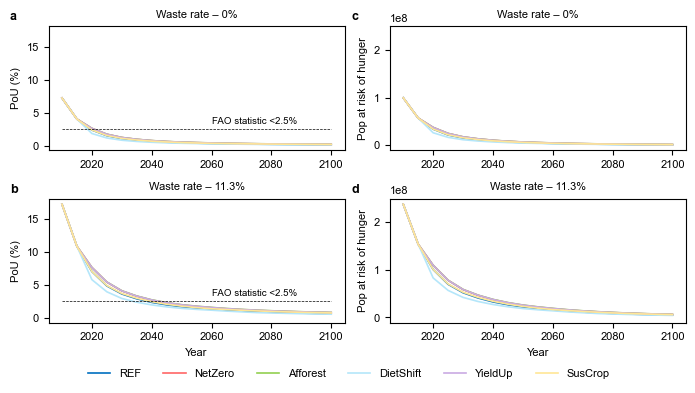

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 自定义颜色（蓝、红、绿、青、紫、黄）
colors = [
    "#0070C0", "#FF6666", "#92D050",
    "#B4E6FA", "#C9AAE3", "#FFE696"
]

# 设置全局字体大小为 7 pt
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'

# Excel 文件路径和 Sheet 名
file_path = '/Users/shirley/Downloads/pou.xlsx'
sheet_names = ['0', '11.3', '0%', '11.3%']

# 创建图像尺寸（宽180mm × 高120mm）
fig = plt.figure(figsize=(7, 3.72))
gs = gridspec.GridSpec(2, 2, figure=fig)  # 3行2列

# 子图容器
axes = []

# 前三图（左列）共用一个 yscale
for i in range(2):
    ax = fig.add_subplot(gs[i, 0], sharey=axes[0] if i > 0 else None)
    axes.append(ax)

# 后三图（右列）共用另一个 yscale
for i in range(2):
    ax = fig.add_subplot(gs[i, 1], sharey=axes[2] if i > 0 else None)
    axes.append(ax)

# 绘图
lines = []
labels = []
subplot_labels = ['a', 'b', 'c', 'd']
for idx, (sheet, ax) in enumerate(zip(sheet_names, axes)):
    df = pd.read_excel(file_path, sheet_name=sheet)
    df.set_index(df.columns[0], inplace=True)
    df.columns = df.columns.astype(str)
    x = df.columns.astype(int)

    for i, scenario in enumerate(df.index):
        line, = ax.plot(x, df.loc[scenario], label=scenario, color=colors[i], linewidth=1.2)
      
        if idx == 0:
            lines.append(line)
            labels.append(scenario)
    ax.set_title(f"Waste rate – {sheet}%" if idx in [0, 1] else f"Waste rate – {sheet}", fontsize=8)
    ax.set_ylabel("PoU (%)" if idx in [0, 1] else "Pop at risk of hunger")  # 左边列保留 y 标签
     # ✅ 添加子图标签（如 'a', 'b', ...），位置为左上角
    ax.text(
        -0.13, 1.12,                       # 相对坐标（x=1%，y=98%）
        f"{subplot_labels[idx]}",      # 标签文本
        transform=ax.transAxes,          # 使用 Axes 坐标系（0~1）
        fontsize=9,
        fontweight='bold',
        va='top', ha='left'
    )
    # ✅ 只给前三个子图加参考线
    if idx < 2:
        ax.plot(x, [2.5]*len(x), linestyle='--', color='black', linewidth=0.5)    
            # 添加标注文字
        ax.text(
           2060, 3,                          # 位置：X=2080，Y略高于2.5
           "FAO statistic <2.5%",              # 标注内容
           fontsize=7, color='black',        # 字体大小与颜色
           ha='left', va='bottom'              # 左对齐，底部对齐
        )

# 设置底部 x 标签（只设置底行子图）
axes[1].set_xlabel("Year")
axes[3].set_xlabel("Year")

# 共用 legend，底部一行，无边框
fig.legend(
    lines,
    labels,
    loc='lower center',
    ncol=6,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05),
    fontsize=8
)

# 紧凑布局 + 给 legend 留空间
plt.tight_layout()
plt.savefig('/Volumes/UCL/论文工作/forestation/my_output_folder/plots/S4_/pou.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
